# Simple linear regression

Exploring the relationship between your radio promotion budget and sales. 



In [1]:
# Import relevant Python libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
# Load the dataset 
data = pd.read_csv(r'D:\Data analysis\google advanced data analytics\datasets\marketing_sales_data.csv')

##  Data Exploration

In [3]:
# Display the first 10 rows of the data
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


#### Observation about the variables in the dataset

- The data includes the following information:
    - TV promotion budget (expressed as "Low", "Medium", or "High") 
    - Radio promotion budget
    - Social media promotion budget
    - Type of influencer that the promotion is in collaboration with (expressed as "Mega", "Macro", or "Micro", or "Nano")
        - Note: Mega-influencers have over 1 million followers, macro-influencers have 100,000 to 1 million followers, micro-influencers have 10,000 to 100,000 followers, and nano-influencers have fewer than 10,000 followers.
    - Sales accrued from the promotion

In [4]:
# Display number of rows, number of columns
data.shape

(572, 5)

1. There are 572 rows and 5 columns in the data. 
One way to interpret this is that 572 companies are represented in the data, along with 5 aspects about each company that reveals how they promote their products/services and the sales accrued from their promotion.

Checking for missing values in the rows of the data. 

In [4]:
# Start with .isna() to get booleans indicating whether each value in the data is missing
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [5]:

# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row
data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

If you would like to read more about the `any()` function, feel free to refer to its documentation, available in the references section of this lab.

In [6]:
#  Use .sum() to get the number of rows that contain missing values
data.isna().any(axis=1).sum()

3

There are 3 rows containing missing values, which is not that many, considering the total number of rows. It is appropriate to drop these rows that contain missing values to proceed with preparing the data for modeling.

### Drop the rows that contain missing values.


In [7]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped
# To update the DataFrame, reassign it to the result
data = data.dropna(axis=0)

In [8]:
# Check to make sure that the data does not contain any rows with missing values now
data.isna().any(axis=1).sum()

0

#### Start by creating a plot of pairwise relationships in the data.
This will help to visualize the relationships between variables in the data and help to check model assumptions. 

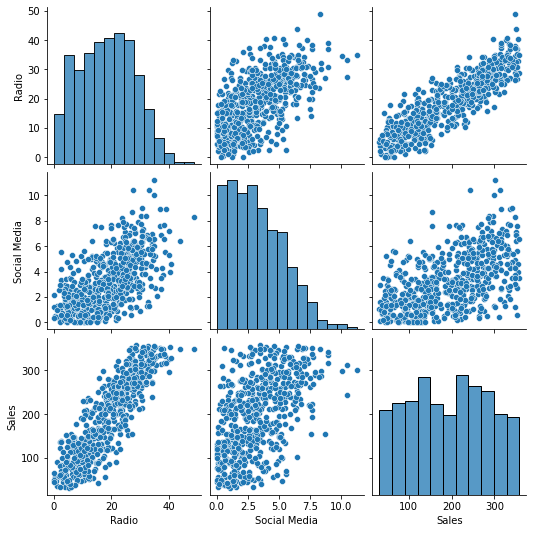

In [10]:
# Create plot of pairwise relationships
sns.pairplot(data)

#### Assumption of linearity
In the scatter plot of `Sales` over `Radio`, the points appear to cluster around a line that indicates a positive association between the two variables. Since the points cluster around a line, it seems the assumption of linearity is met.

##  Model Building

### Start by selecting only the columns that are needed for the model that you will build from the data.

In [9]:
# Selecting relevant columns
# Saving resulting DataFrame in a separate variable to prepare for regression
reg_data = data[["Radio", "Sales"]]

In [10]:
# Display first 10 rows of the new DataFrame

reg_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


#### Writing the linear regression formula for modeling the relationship between the two variables of interest.

In [11]:
# Writing the linear regression formula
# Saving it in a variable
reg_formula = "Sales ~ Radio"

#### Implement the Ordinary Least Squares (OLS) approach for linear regression.

In [14]:
# Implement OLS
OLS = ols(formula = reg_formula, data = reg_data)

#### Create a linear regression model for the data and fit the model to the data.

In [16]:
# Fitting the model to the data
# Saving the fitted model in a variable

model = OLS.fit()

## Results and Evaluation

#### Getting a summary of the results from the model.

In [18]:
# Getting summary of results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          2.07e-176
Time:                        13:03:35   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Analyzing the bottom table from the results summary.

####  What is the y-intercept? 

- The y-intercept is 41.5326. 

#### What is the slope? 

- The slope is 8.1733. 

#### Linear equation you would write to express the relationship between sales and radio promotion budget in the form of y = slope * x + y-intercept? 
- sales = 8.1733 * radio promotion budget + 41.5326

####  The slope in this context means

- One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.
- Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

### Checking model assumptions.

Finish checking the model assumptions. This will help confirm your findings.

### Plot the OLS data with the best fit regression line.

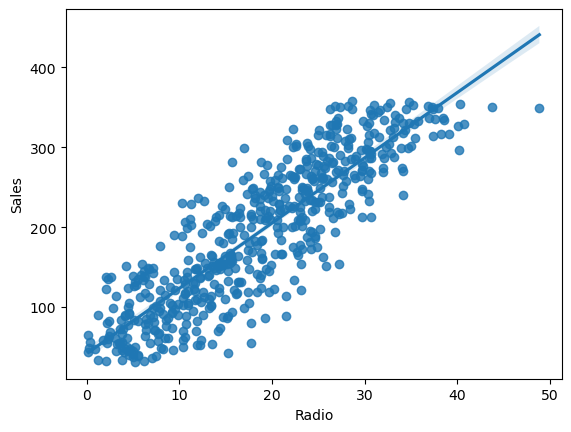

In [21]:
# Plot the OLS data with the best fit regression line

sns.regplot(x = "Radio", y = "Sales", data = reg_data)
plt.show()

#### Observation from the preceding regression plot

- The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. This confirms the assumption of linearity.

### Checking the normality assumption.

Get the residuals from the model to get started.

In [23]:
# Get the residuals from the model
residuals = model.resid


Visualizing the distribution of the residuals.

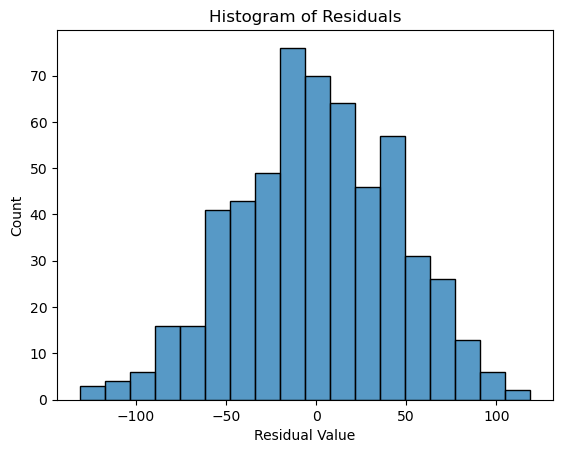

In [24]:
# Visualize the distribution of the residuals

fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()


- Based on the preceding visualization, the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.


### Creating a Q-Q plot to confirm the assumption of normality.

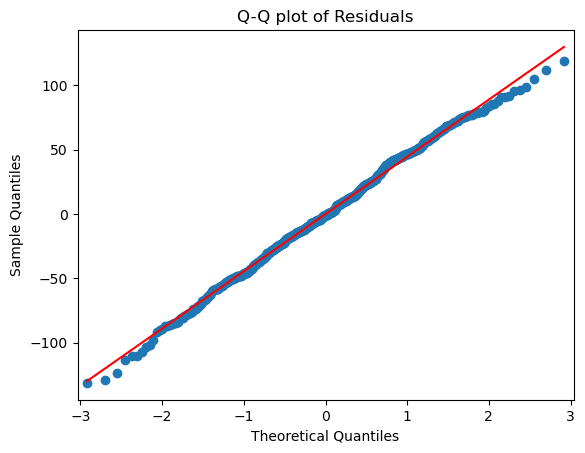

In [25]:
# Create a Q-Q plot 
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

#### Assumption of normality is met.

- In the preceding Q-Q plot, the points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met.

### Checking the assumptions of independent observation and homoscedasticity.

Starting by getting the fitted values from the model.

In [28]:
# Get fitted values
fitted_values = model.predict(reg_data["Radio"])

Creating a scatterplot of the residuals against the fitted values.

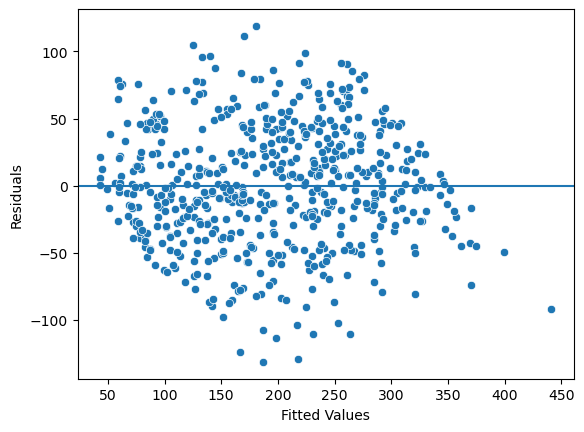

In [29]:
# Creating a scatterplot of residuals against fitted values
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

#### Assumptions of independent observation and homoscedasticity.

- In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

## Conclusion



In the simple linear regression model, the y-intercept is 41.5326 and the slope is 8.1733. 
    One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.
    Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.


The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true. In this context, the null hypothesis is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope. 

**Stakeholders summary**

Based on the dataset at hand and the regression analysis conducted here, there is a notable relationship between radio promotion budget and sales for companies in this data, with a p-value of 0.000 and standard error of 0.194. For companies represented by this data, a 1 million dollar increase in radio promotion budget could be associated with a 8.1733 million dollar increase in sales. It would be worth continuing to promote products/services on the radio. Also, it is recommended to consider further examining the relationship between the two variables (radio promotion budget and sales) in different contexts. For example, it would help to gather more data to understand whether this relationship is different in certain industries or when promoting certain types of products/services. 